<a href="https://colab.research.google.com/github/DSYJ94/Machine-Deep-Learning-/blob/main/Sproutify_Codebase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install OpenCV if not already installed
# !pip install opencv-python-headless

# Installations
!pip install fer
!pip install deepface

# Download Caffe model files for DNN face detection
!wget -q https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -q https://github.com/opencv/opencv_3rdparty/raw/dnn_samples_face_detector_20170830//res10_300x300_ssd_iter_140000.caffemodel

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 24.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 74.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 91.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.6/755.6 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 97.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 60.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=ea6f70990aae02056ad05c02152921138c87af0cd35b0ef4daa4129c13029a24
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [ ]:
import cv2
import os
import numpy as np
from google.colab import files
from google.colab.patches import cv2_imshow
from deepface import DeepFace
from fer import FER

25-06-26 16:27:15 - Directory /root/.deepface has been created
25-06-26 16:27:15 - Directory /root/.deepface/weights has been created


In [ ]:
# Upload an image
uploaded = files.upload()
img_path = next(iter(uploaded))  # Get the uploaded file name

Saving Open AI founding.jpg to Open AI founding.jpg


In [ ]:
# Create 'faces' directory if it doesn't exist
faces123 = 'faces123'
os.makedirs(faces123, exist_ok=True)


# # Load the image
# image = cv2.imread(img_path)
# if image is None:
#     raise ValueError(f"Could not load image {img_path}")
# (h, w) = image.shape[:2]

In [ ]:
# Loading OpenCV DNN face detector
net = cv2.dnn.readNetFromCaffe("deploy.prototxt", "res10_300x300_ssd_iter_140000.caffemodel") # deploy.prototxt is a in Caffe’s “prototxt” format that describes the layer-by-layer structure of the network

In [ ]:
# Reload image from disk every time
image = cv2.imread(img_path)
if image is None:
    raise ValueError("Image could not be loaded. Check the path or reupload.")
original_image = image.copy()

(h, w) = original_image.shape[:2]

# Convert image to blob
blob = cv2.dnn.blobFromImage(original_image, scalefactor=1.0, size=(300, 300), mean=(104.0, 177.0, 123.0))  # Mean subtraction for normalization

# Forward pass and processing
net.setInput(blob)
detections = net.forward()

# Prepare lists for raw detections
boxes = []
confidences = []
confidence_threshold = 0.2

for i in range(0, detections.shape[2]):
    confidence = detections[0, 0, i, 2]

    if confidence > confidence_threshold:
        box = detections[0, 0, i, 3:7] * [w, h, w, h]
        (startX, startY, endX, endY) = box.astype("int")

        width = endX - startX
        height = endY - startY

        # Optional sanitization can be added here
        boxes.append([startX, startY, width, height])
        confidences.append(float(confidence))

# Apply Non-Maximum Suppression
nms_threshold = 0.4
indices = cv2.dnn.NMSBoxes(boxes, confidences, confidence_threshold, nms_threshold)

# Final face list after NMS
faces = []

for i in indices:
    i = i[0] if isinstance(i, (list, tuple, np.ndarray)) else i
    (x, y, w_box, h_box) = boxes[i]
    faces.append((x, y, w_box, h_box))
    cv2.rectangle(image, (x, y), (x + w_box, y + h_box), (0, 255, 0), 2)

print(f"Detected {len(faces)} face(s) after NMS.")

# # Prepare lists for raw detections
# faces = []
# confidence_threshold = 0.3

# for i in range(0, detections.shape[2]):
#     confidence = detections[0, 0, i, 2]

#     if confidence > confidence_threshold:
#         box = detections[0, 0, i, 3:7] * [w, h, w, h]
#         (startX, startY, endX, endY) = box.astype("int")

#         # Sanitize coordinates
#         startX = max(0, startX)
#         startY = max(0, startY)
#         endX = min(w, endX)
#         endY = min(h, endY)

#         # Skip tiny or invalid boxes
#         if endX <= startX or endY <= startY:
#             continue

#         # Append as (x, y, w, h)
#         faces.append((startX, startY, endX - startX, endY - startY))
#         # Draw rectangle on a copy of original image
#         cv2.rectangle(image, (startX, startY), (endX, endY), (0, 255, 0), 2)

# print(f"Detected {len(faces)} face(s).")

Detected 4 face(s) after NMS.


In [ ]:
# Draw rectangles on the original image for visualization
image_with_boxes = image.copy()
for (x, y, w, h) in faces:
    cv2.rectangle(image_with_boxes, (x, y), (x+w, y+h), (0, 255, 0), 2)

Uploaded image with detected faces:


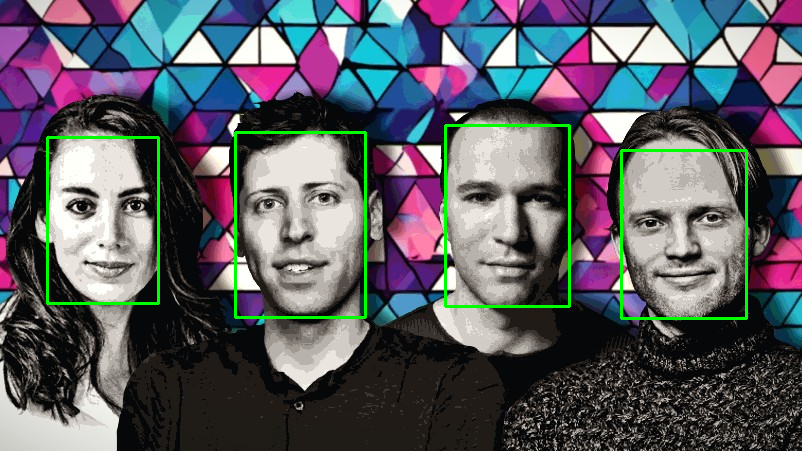

Face 1:


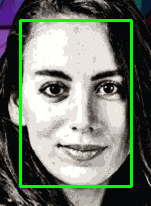

Face 2:


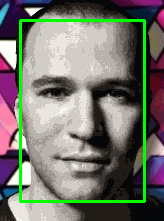

Face 3:


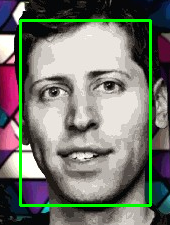

Face 4:


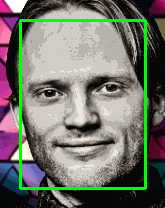

All detected faces have been saved in the 'faces123' folder.


In [ ]:
# Display the uploaded image with detected faces
print("Uploaded image with detected faces:")
cv2_imshow(image_with_boxes)  # Works in Colab[4][3]

# Iterate and save each face, and display them
for idx, (x, y, w, h) in enumerate(faces):
  # Adjust padding (e.g., add 10 pixels around the face)
    padding = 20
    startY = max(0, y - padding)
    endY = min(image.shape[0], y + h + padding)
    startX = max(0, x - padding)
    endX = min(image.shape[1], x + w + padding)

    face_crop = image[startY:endY, startX:endX]
    face_filename = os.path.join(faces123, f'face_{idx+1}.jpg')
    cv2.imwrite(face_filename, face_crop)
    print(f"Face {idx+1}:")
    cv2_imshow(face_crop)

    # face_crop = image[y:y+h, x:x+w]
    # face_filename = os.path.join(faces123, f'face_{idx+1}.jpg')
    # cv2.imwrite(face_filename, face_crop)
    # print(f"Face {idx+1}:")
    # cv2_imshow(face_crop)

print("All detected faces have been saved in the 'faces123' folder.")

Number of images in 'faces123': 4
Displaying image: face_3.jpg


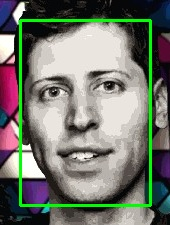

Displaying image: face_1.jpg


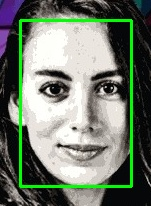

Displaying image: face_2.jpg


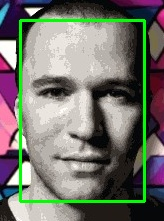

Displaying image: face_4.jpg


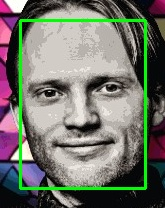

In [ ]:
# Checking for faces directory and saves

import os
face_files = os.listdir("faces123")
print(f"Number of images in '{faces123}': {len(face_files)}")

for filename in face_files:
    if filename.endswith(('.jpg')):
        image_path = os.path.join(faces123,filename)
        print(f"Displaying image: {filename}")
        img = cv2.imread(image_path)
        if img is not None:
            cv2_imshow(img)
        else:
            print(f"Could not read image: {filename}")

Displaying image: face_3.jpg


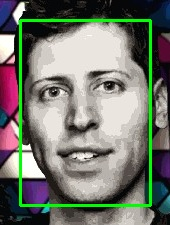

This person is likely to display:

neutral:	70.0%
surprise:	16.0%
happy:	9.0%
sad:	3.0%
fear:	2.0%
angry:	1.0%
disgust:	0.0%
Displaying image: face_1.jpg


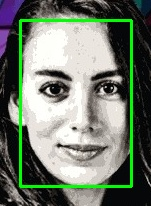

This person is likely to display:

sad:	74.0%
neutral:	16.0%
fear:	6.0%
happy:	4.0%
angry:	0.0%
disgust:	0.0%
surprise:	0.0%
Displaying image: face_2.jpg


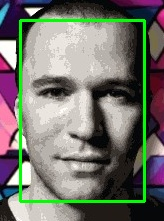

This person is likely to display:

neutral:	59.0%
sad:	33.0%
fear:	4.0%
happy:	3.0%
surprise:	1.0%
angry:	0.0%
disgust:	0.0%
Displaying image: face_4.jpg


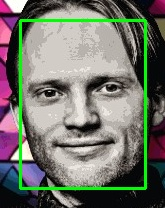

This person is likely to display:

happy:	69.0%
neutral:	28.000000000000004%
angry:	2.0%
sad:	1.0%
disgust:	0.0%
fear:	0.0%
surprise:	0.0%


In [ ]:
# Emotion detection via FER
detector = FER() # loading FER class of functions

for filename in face_files:
    if filename.endswith(('.jpg')):
        image_path = os.path.join(faces123,filename)
        print(f"Displaying image: {filename}")
        img = cv2.imread(image_path)

        if img is not None:
            cv2_imshow(img)
            emotions_list = detector.detect_emotions(img)
            for emotions in (emotions_list):
              emotions_dict = emotions['emotions']

              # Sort the emotions by their float values
              sorted_emotions = sorted(emotions_dict.items(), key=lambda item: item[1], reverse=True) # Sorting#

              # Printing emotions by Probability
              print("This person is likely to display:\n")
              for tuple in sorted_emotions:
                scores = tuple[1] # Assigning scores from tuple
                print(f"""{tuple[0]}:\t{scores*100}%""")



DeepFace Emotion Analysis Results:



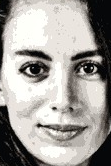

25-06-26 16:28:20 - facial_expression_model_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facial_expression_model_weights.h5
To: /root/.deepface/weights/facial_expression_model_weights.h5
100%|██████████| 5.98M/5.98M [00:00<00:00, 64.5MB/s]


Face 1:
  Dominant Emotion: happy
  angry: 0.0%
  disgust: 0.0%
  fear: 13.4%
  happy: 63.8%
  sad: 20.7%
  surprise: 0.0%
  neutral: 2.2%



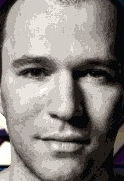

Face 2:
  Dominant Emotion: neutral
  angry: 0.0%
  disgust: 0.0%
  fear: 0.0%
  happy: 0.1%
  sad: 0.2%
  surprise: 0.0%
  neutral: 99.7%



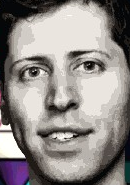

Face 3:
  Dominant Emotion: fear
  angry: 0.1%
  disgust: 0.0%
  fear: 83.8%
  happy: 0.0%
  sad: 4.9%
  surprise: 0.1%
  neutral: 11.1%



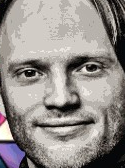

Face 4:
  Dominant Emotion: happy
  angry: 0.0%
  disgust: 0.0%
  fear: 0.0%
  happy: 100.0%
  sad: 0.0%
  surprise: 0.0%
  neutral: 0.0%



In [ ]:
# Emotion detection via DeepFace

# Reload image to avoid FER modifications (optional)
image = cv2.imread(img_path)

print("DeepFace Emotion Analysis Results:\n")

for idx, (x, y, w_box, h_box) in enumerate(faces):
    face_crop = image[y:y + h_box, x:x + w_box]

    if face_crop.size == 0:
        print(f"Face {idx + 1}: Invalid crop, skipping.")
        continue


    # Display face
    cv2_imshow(face_crop)

    try:
        analysis = DeepFace.analyze(face_crop, actions=['emotion'], enforce_detection=False)
        dominant_emotion = analysis[0]['dominant_emotion']
        emotion_scores = analysis[0]['emotion']

        print(f"Face {idx + 1}:")
        print(f"  Dominant Emotion: {dominant_emotion}")
        for emo, score in emotion_scores.items():
            print(f"  {emo}: {score:.1f}%")
        print()
    except Exception as e:
        print(f"Face {idx + 1}: DeepFace failed to analyze. Reason: {e}")